In [1]:
from skimage.io import imsave, imshow, show
import numpy as np
from tqdm import tqdm_notebook
from skimage.feature import hog
from keras.datasets import cifar100
from skimage import data, exposure, color
import cv2
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import ipykernel
from keras import regularizers
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import array_to_img, img_to_array
from keras.utils import to_categorical
from keras import backend as K
K.set_image_dim_ordering('th')

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
people_labels_id = ['man', 'woman', 'baby', 'boy', 'girl']

CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

pidx = [CIFAR100_LABELS_LIST.index(label) for label in people_labels_id]

man = x_train[y_train.flatten() == 46]
woman = x_train[y_train.flatten() == 98]
baby = x_train[y_train.flatten() == 2]
boy = x_train[y_train.flatten() == 11]
girl = x_train[y_train.flatten() == 35]

people_dataset = np.vstack((man, woman, baby, boy, girl))
people_labels = np.ones(people_dataset.shape[0]).reshape(-1, 1)

non_people_dataset = []

for label in range(len(CIFAR100_LABELS_LIST)):
    if label not in pidx:
        label_dataset = x_train[y_train.flatten() == label][:40]
        non_people_dataset.append(label_dataset)



non_people_dataset = np.array(non_people_dataset)
sh1 = non_people_dataset.shape[0]
sh2 = non_people_dataset.shape[1]
non_people_dataset = non_people_dataset.reshape(sh1 * sh2, 3, 32, 32)
non_people_labels = np.zeros(non_people_dataset.shape[0]).reshape(-1, 1)

dataset = np.vstack((people_dataset, non_people_dataset))
labels = np.vstack((people_labels, non_people_labels))
categorial_labels = to_categorical(labels)

X_train, X_test, y_train, y_test = train_test_split(dataset, categorial_labels, test_size=0.2, random_state=42)

Архитектура сети - VGG16 из лабораторной 5. Размерность выходного слоя 2, так как бинарная классификация

In [ ]:
input_shape = (3, 32, 32)

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())


model.add(Dense(4096, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

optimizer = RMSprop(lr=0.0001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=100, verbose=2, validation_data=(X_test, y_test))

[]

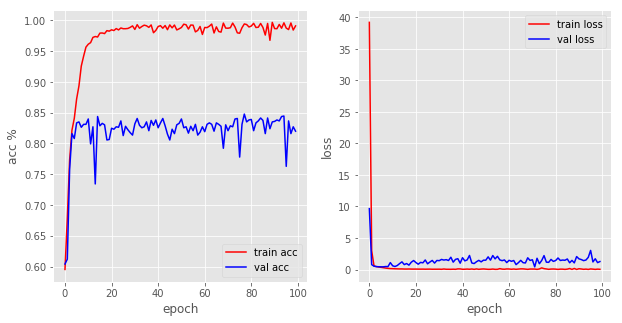

In [16]:
plt.figure(figsize=[10,5])
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], c='r', label='train acc')
plt.plot(history.history['val_acc'], c='b', label='val acc')
plt.xlabel('epoch')
plt.ylabel('acc %')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], c='r', label='train loss')
plt.plot(history.history['val_loss'], c='b', label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.plot()

Архитектура сети - простая сверточная сеть с тремя слоями свертки

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

# optimizer = SGD(lr=0.0001)
optimizer = RMSprop(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=100, verbose=2, validation_data=(X_test, y_test))

[]

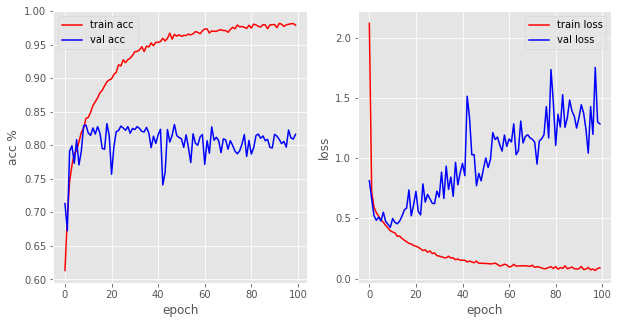

In [18]:
plt.figure(figsize=[10,5])
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], c='r', label='train acc')
plt.plot(history.history['val_acc'], c='b', label='val acc')
plt.xlabel('epoch')
plt.ylabel('acc %')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], c='r', label='train loss')
plt.plot(history.history['val_loss'], c='b', label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.plot()

Точность классификации VGG16 выше на ~5%